In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Read data
titanik = pd.read_csv('../data/titanik.csv', sep = '\t')
titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describe data
titanik.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Figure size 1440x720 with 0 Axes>

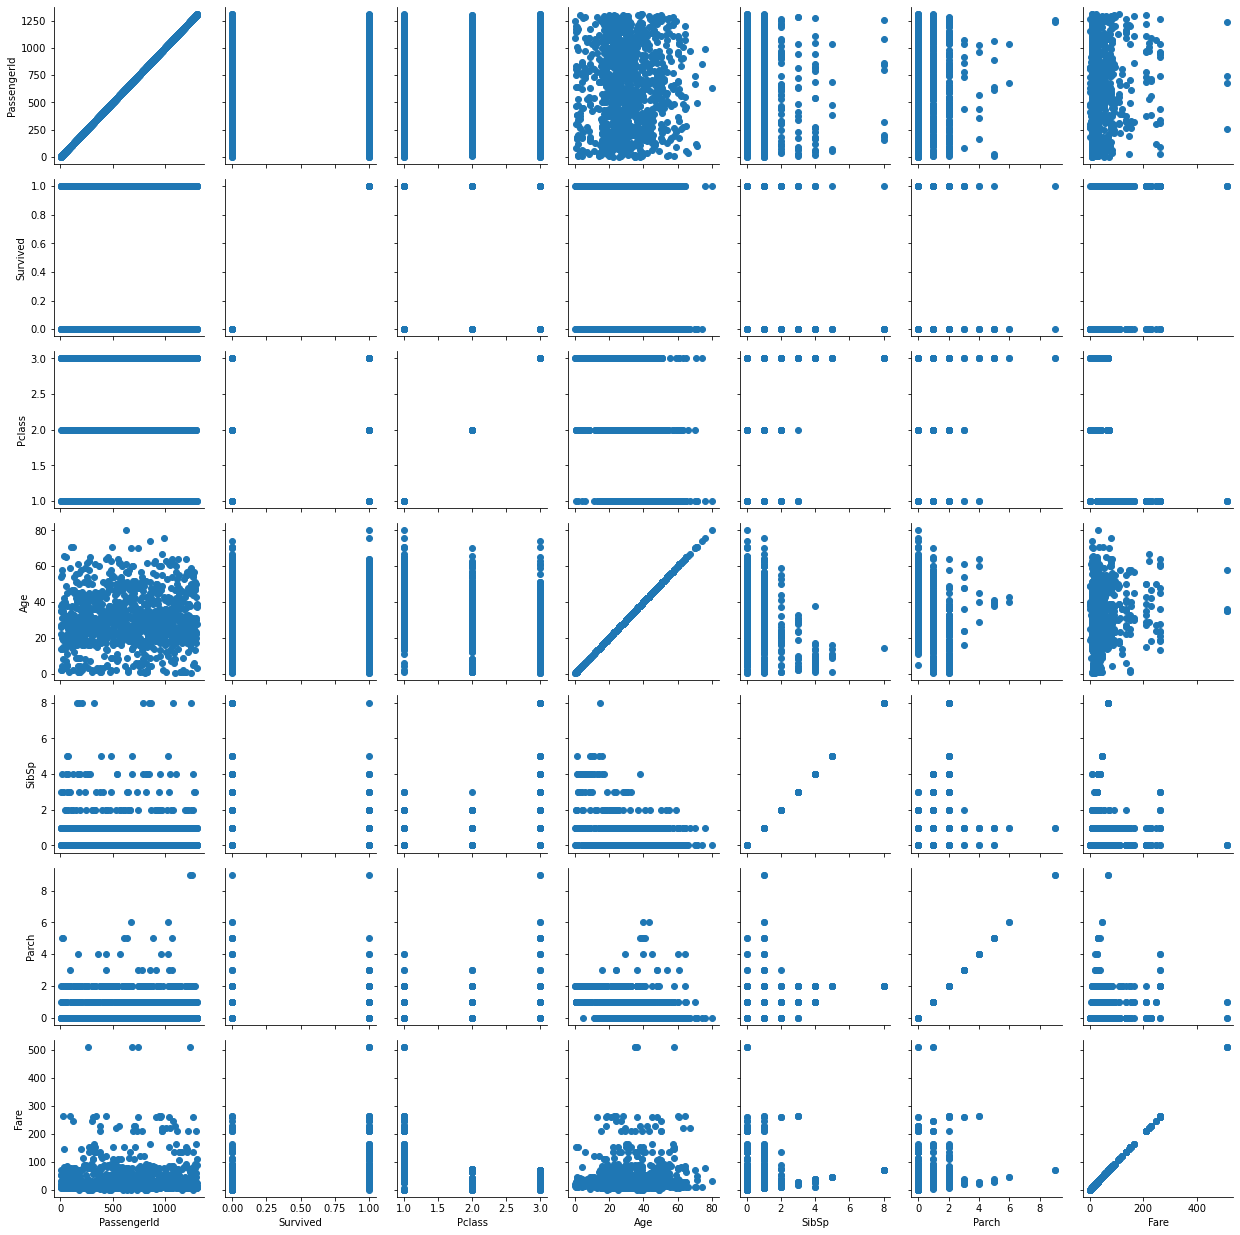

In [4]:
# Draw a correlation table of all variables
plt.figure(figsize=(20, 10))
sns.PairGrid(titanik).map(plt.scatter)

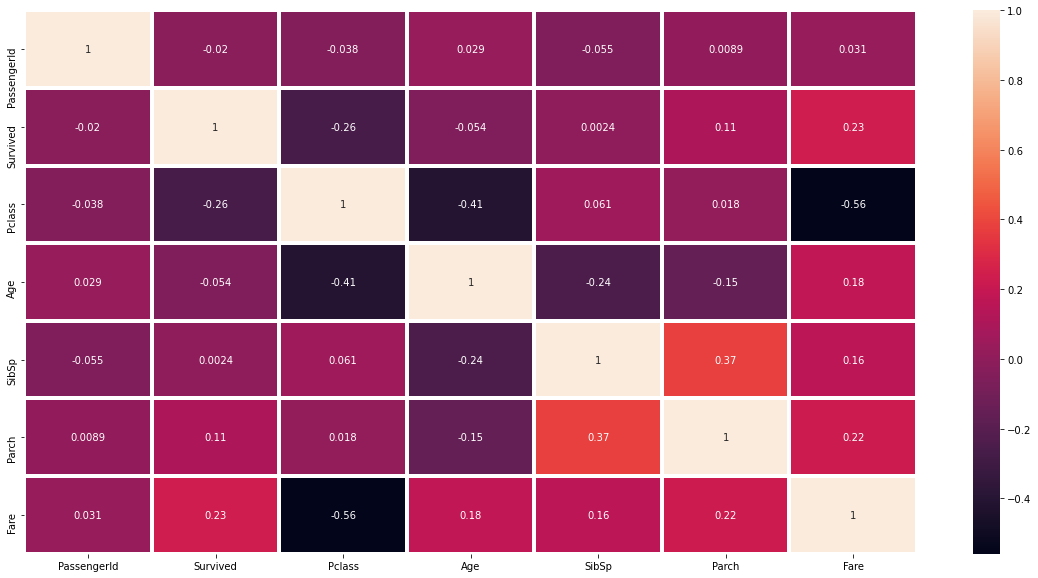

In [5]:
# Try do draw correlation matrix

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(titanik.corr(), annot = True, linewidths=3 , ax=ax)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

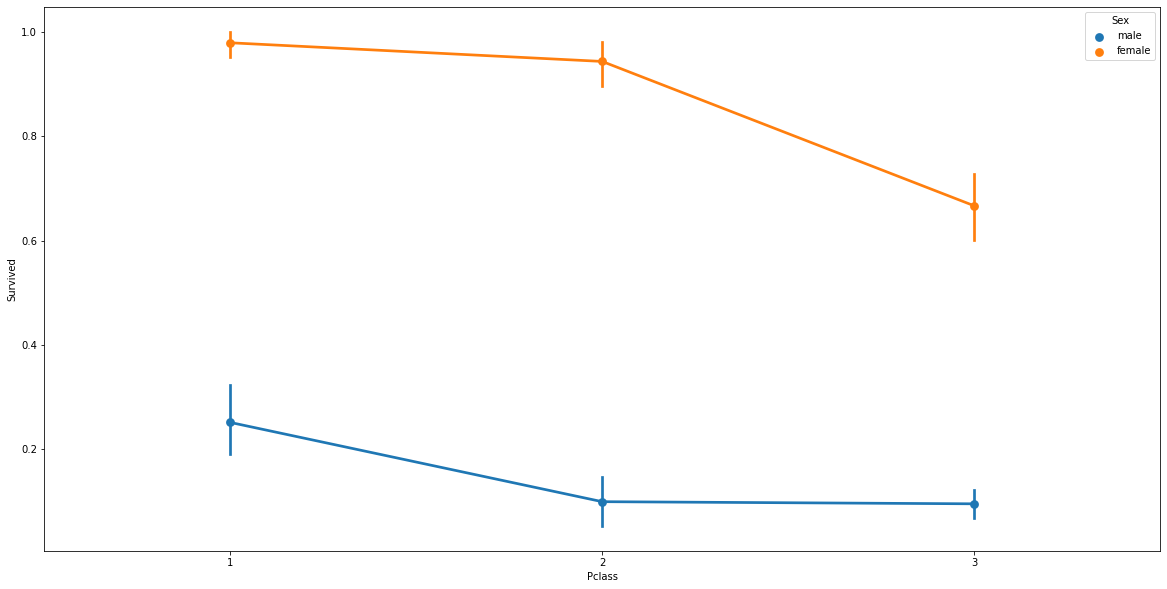

In [6]:
# Let's see, сould the class and gender of the passenger affect his survival
plt.figure(figsize=(20, 10))
sns.pointplot(y="Survived", x="Pclass", hue="Sex", data=titanik)

Как мы видим, возможно у женщин было в принципе больше шансов выжить, чем у мужчин (были же настоящие мужчины...). 
Более того, по всей видимости, люди более выского класса (1-го) имели больше шансов выжить, чем люди более низкого класса.

<AxesSubplot:xlabel='Age_ranks', ylabel='Survived'>

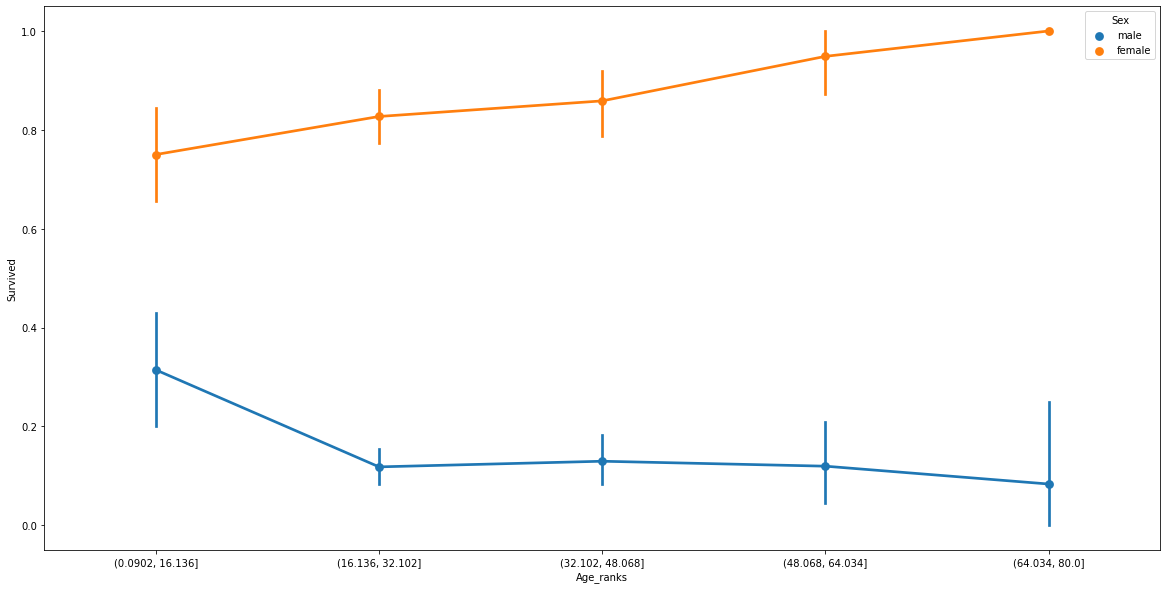

In [7]:
# Let's see, сould the age of the passenger affect his survival
titanik["Age_ranks"] = pd.cut(titanik.Age, bins=5)
plt.figure(figsize=(20, 10))
sns.pointplot(y="Survived", x="Age_ranks", hue="Sex", data=titanik)

Итак, возможно возраст также влиял на вероятность выживания. Причем возможно, что у мужского населения чаще спасали детей и стариков, а у женщин идет тенденция к велечичению виживаемости с возрастом. Возможно это связано с тем, что детей спасали вместе с их матерями. 
Однако, такую гипотезу также нужно проверять